<a href="https://colab.research.google.com/github/nwokochachijiokeronald/CE888/blob/main/lab2_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(df)
print();
print(data)
print(type(data))
x = data
print(x)
sample_size = len(x)

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
<class 'numpy.ndarray'>
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  
  array_mean = []
  for count in range(n_bootstraps):
      sample = np.random.choice(data, size=(sample_size))
      sample_mean = (np.mean(sample))
      array_mean.append(sample_mean)
      #print(sample, sample_mean)
  sort_array_mean = np.sort(array_mean)
  #print("Unsorted array of means: ", array_mean)
  data_mean= (np.mean(array_mean))
  #print()
  #print("Sorted array of means: ", sort_array_mean)
  lower = np.percentile(sort_array_mean, 2.5)#("2.5th percentile of mean array : ", np.percentile(sort_array_mean, 2.5))
  upper = np.percentile(sort_array_mean, 97.5)  #("97.5th percentile of mean array : ", np.percentile(sort_array_mean, 97.5))
	#print (data_mean, mean_mean, lower, upper)
  return data_mean, lower, upper


print(bootstrap_mean(np.arange(25), 20, 100))



(9.3235, 7.3975, 11.681249999999999)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

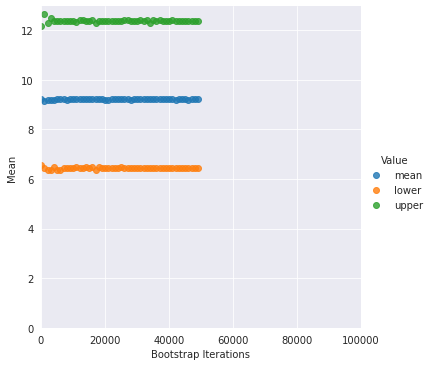

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  
  array_mean = []
  #ci = int(input("Enter an integer between 0 and 100 for the desired confidence interval: "))
  for count in range(n_bootstraps):
      sample = np.random.choice(data, size=(sample_size))
      sample_mean = (np.mean(sample))
      array_mean.append(sample_mean)
  sort_array_mean = np.sort(array_mean)
  data_mean= (np.mean(array_mean))
  ci_percentile = (100-ci)*0.5
  lower = np.percentile(sort_array_mean, ci_percentile)             # Lower bound of confidence interval
  upper = np.percentile(sort_array_mean, (ci_percentile+ci))           # Upper bound of confidence interval
  return data_mean, lower, upper
  

print(bootstrap_mean_ci(np.arange(25), 20, 10000, 95))

(9.216070000000002, 6.85, 11.8)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

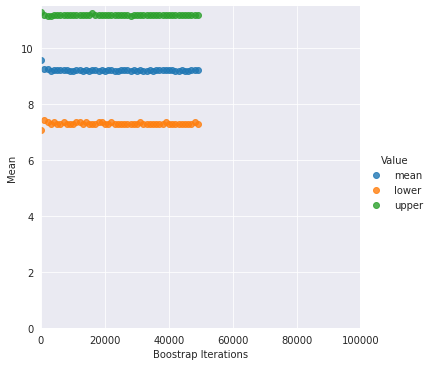

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


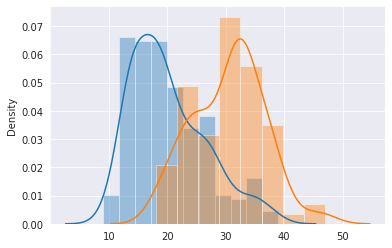

In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


# Load the data
dataVehicle = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
#print(dataVehicle)
#sns.histplot(dataVehicle.columns[0], kde = True)
cF = dataVehicle[dataVehicle.columns[0]].values
nF = dataVehicle[dataVehicle.columns[1]].values
nF = nF[np.logical_not(np.isnan(nF))]
sns.set_style('darkgrid')
sns.distplot(cF)
sns.distplot(nF)

# New Section

# New Section

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
# <---INSERT YOUR CODE HERE--->
#Calculating the mean of both samples.

meanCF = np.mean(cF)
meanNF = np.mean(nF)
#print (len(nF))
#print(nF)
print("The mean for the current fleet is: ", meanCF, "while the mean for the new fleet is: ", meanNF)

#Using the bootstrap function created earlier to Construct the 95% CI of the mean of the current fleet

print(bootstrap_mean_ci(cF, len(cF), 100, 95))

#Using the bootstrap function created earlier to Construct the 95% CI of the mean of the new fleet

print(bootstrap_mean_ci(nF, len(nF), 100, 95))

#Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)
print(permut_test(cF, nF, 20000))

The mean for the current fleet is:  20.14457831325301 while the mean for the new fleet is:  30.481012658227847
(9.263855421686745, 8.630522088353413, 9.85793172690763)
(9.104683544303798, 8.11993670886076, 10.428797468354428)
20.14457831325301 30.481012658227847 10.336434344974837
0.0
0.0


In [ ]:
print(bootstrap_mean_ci(nF, len(nF), 10000, 95))


(9.21321265822785, 7.987341772151899, 10.493987341772147)


In [ ]:
def permutation(Concat_array):
  np.random.shuffle(Concat_array)
  return Concat_array

In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    y = 0

    old = np.array(sample1)
    new = np.array(sample2)
    mean_old = np.mean(old)
    mean_new = np.mean(new)
    test_obs = mean_new - mean_old
    print(mean_old, mean_new, test_obs)

    for i in range(n_permutations):
      concat = np.concatenate((old, new))
      perm = np.random.permutation(concat)
      #pold = perm[:int(len(perm)/2)]
      pold = perm[:(len(old))]
      #pnew = perm[int(len(perm)/2):]
      pnew = perm[int(len(old)):]
      mean_pold = np.mean(pold)
      mean_pnew = np.mean(pnew)
      test_perm = mean_pnew - mean_pold
      #print(test_perm)
      if test_perm > test_obs:
        y += 1
    
    pvalue = y/n_permutations
    print (pvalue)
    #print(old, new)
    return pvalue


print(permut_test(cF, nF, 20000))

20.14457831325301 30.481012658227847 10.336434344974837
0.0
0.0


In [ ]:
old_flt = dataVehicle['Current fleet'].dropna()
new_flt = dataVehicle['New Fleet'].dropna().astype("int64")
permut_test(old_flt,new_flt,2000)

20.14457831325301 30.481012658227847 10.336434344974837
0.0


0.0

In [ ]:
np.array(dataVehicle['Current fleet'])

array([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 22, 18, 21,
       21, 10, 10, 11,  9, 28, 25, 19, 16, 17, 19, 18, 14, 14, 14, 14, 12,
       13, 13, 18, 22, 19, 18, 23, 26, 25, 20, 21, 13, 14, 15, 14, 17, 11,
       13, 12, 13, 15, 13, 13, 14, 22, 28, 13, 14, 13, 14, 15, 12, 13, 13,
       14, 13, 12, 13, 18, 16, 18, 18, 23, 11, 12, 13, 12, 18, 21, 19, 21,
       15, 16, 15, 11, 20, 21, 19, 15, 26, 25, 16, 16, 18, 16, 13, 14, 14,
       14, 28, 19, 18, 15, 15, 16, 15, 16, 14, 17, 16, 15, 18, 21, 20, 13,
       23, 20, 23, 18, 19, 25, 26, 18, 16, 16, 15, 22, 22, 24, 23, 29, 25,
       20, 18, 19, 18, 27, 13, 17, 13, 13, 13, 30, 26, 18, 17, 16, 15, 18,
       21, 19, 19, 16, 16, 16, 16, 25, 26, 31, 34, 36, 20, 19, 20, 19, 21,
       20, 25, 21, 19, 21, 21, 19, 18, 19, 18, 18, 18, 30, 31, 23, 24, 22,
       20, 22, 20, 21, 17, 18, 17, 18, 17, 16, 19, 19, 36, 27, 23, 24, 34,
       35, 28, 29, 27, 34, 32, 28, 26, 24, 19, 28, 24, 27, 27, 26, 24, 30,
       39, 35, 34, 30, 22

In [ ]:
old = [0,0,0,0,0,0,1,0,0,1,0]
new = [1,0,0,1,1,1,0,0,0,1,0]
permut_test(old,new,30000)

0.18181818181818182 0.45454545454545453 0.2727272727272727
0.031766666666666665


0.031766666666666665

In [ ]:
bootstrap_mean_ci(new_flt,len(new_flt),10000,95)

(9.21236582278481, 8.0, 10.50632911392405)

In [ ]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [ ]:
len(dem_share_OH)

88

In [ ]:
len(dem_share_PA)

67

In [ ]:
pa = pd.DataFrame(dem_share_PA)
pa.mean()

0    45.476418
dtype: float64

In [ ]:
oh = pd.DataFrame(dem_share_OH)
oh.mean()

0    44.318182
dtype: float64

In [ ]:
bootstrap_mean_ci(dem_share_OH,len(dem_share_OH),25000,90)

(9.215258636363636, 8.238636363636363, 10.227272727272727)

In [ ]:
bootstrap_mean_ci(dem_share_PA,len(dem_share_PA),25000,90)

(9.211496716417912, 8.08955223880597, 10.388059701492537)

In [ ]:
permut_test(dem_share_OH,dem_share_PA,20000)

44.31818181818182 45.476417910447765 1.1582360922659447
0.23625


0.23625

In [ ]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  mean_array = []
  sample = np.array(sample)
  bootstrap_array = np.random.choice(sample, size = (n_bootstraps,sample_size),replace = True)
  data_mean = bootstrap_array.mean()
  mean_array = []
  for i in range(bootstrap_array.shape[0]):
    mean_array.append(bootstrap_array[i].std())
  mean_array.sort()
  lower = np.percentile(mean_array,(100 - ci)/2)
  upper = np.percentile(mean_array,ci+((100 - ci)/2))
  return data_mean, lower, upper

In [ ]:
bootstrap_std_ci(new_flt,len(new_flt),10000,73)

(30.48196835443038, 5.518079416631497, 6.520297520843651)

In [ ]:
bootstrap_mean_ci(data, data.shape[0], 10000, 80)

(9.200421428571426, 7.285714285714286, 11.214285714285714)

In [ ]:
bootstrap_std_ci(data, data.shape[0],10000,90)

(9.249957142857143, 3.058110661229664, 7.145713714514171)